In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.size'] = 12

# Working with the covid 19 data set 

#### For the final project we decided to work with the covid-19 dataset because we were interested in exploring the intersection between covid-19 and socio-economic status.

##### We first imported the data originally given to us. We decided not to add the most up to date data in the GitHub. All the conclusion and insights generated from our analysis solely comes from the data initially given to us. 

We’ve noticed that there has been news reports on how covid-19 is personally negatively affecting low income black communities. We noticed that although the given dataset did not have information pertaining to race, it had indicators that could potentially give insight on whether or not a community is underserved. The columns in particular that we will be focusing on is SVIPercentile, HPSAShortage, HPSAServedPop, and HPSAUnderservedPop. The definitions of these three columns are provided below.

***SVIPercentile*** - the county's overall percentile ranking indicating the CDC's Social Vulnerability Index (SVI); higher ranking indicates greater social vulnerability


***HPSAShortage*** - the number of full-time equivalent (FTE) practitioners needed in the Health Professional Shortage Area (HPSA) so that it will achieve the population to practitioner target ratio; target ratio is determined by the type (discipline) of the HPSA

***HPSAServedPop*** estimated total population served by the full-time equivalent (FTE) Health care practitioners within a (HPSA)

***HPSAUnderservedPop*** estimated underserved population served by the full-time equivalent (FTE) health care practitioners within a HPSA	
___
## Problem Questions

The Specific question that we are trying to answer is do underserved communities in the United States have a higher covid-19 mortality rate than the US Average. ***How does HPSAShortage contribute to this?*** In 2013, the National Health Service Corps stated that the Health Professional Shortage Areas with greatest need is defined as a site with a HPSA score of 16 or above(1). ***Does having a HPSA shortage greater than or equal to 16, indicate a covid-19 mortality greater than the national average?*** In addition, what are some other factors, related to a country being under-supported, that best determine a county's Covid-19 mortality rate? What could be good models for predicting mortality rate based on these factors?

(1*) https://nhsc.hrsa.gov/currentmembers/scholars/fromtrainingtopractice/disciplinesdesignfuture.pdf
___

In [4]:
abridged_counties = pd.read_csv("covid19/abridged_couties.csv")
states = pd.read_csv("covid19/4.18states.csv")
us_confirmed = pd.read_csv("covid19/time_series_covid19_confirmed_US.csv")
us_deaths = pd.read_csv("covid19/time_series_covid19_deaths_US.csv")

In [5]:
abridged_counties.head()

,countyFIPS,STATEFP,COUNTYFP,CountyName,StateName,State,lat,lon,POP_LATITUDE,POP_LONGITUDE,...,>500 gatherings,public schools,restaurant dine-in,entertainment/gym,federal guidelines,foreign travel ban,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,01001,1.0,1.0,Autauga,AL,Alabama,32.540091,-86.645649,32.500389,-86.494165,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4354,NaN,NaN,NaN
1,01003,1.0,3.0,Baldwin,AL,Alabama,30.738314,-87.726272,30.548923,-87.762381,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.2162,NaN,NaN,NaN
2,01005,1.0,5.0,Barbour,AL,Alabama,31.874030,-85.397327,31.844036,-85.310038,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.9959,6.08,5400.0,18241.0
3,01007,1.0,7.0,Bibb,AL,Alabama,32.999024,-87.125260,33.030921,-87.127659,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.6003,2.75,14980.0,6120.0
4,01009,1.0,9.0,Blount,AL,Alabama,33.990440,-86.562711,33.955243,-86.591491,...,737497.0,737500.0,737503.0,737512.0,737500.0,737495.0,0.4242,7.21,31850.0,25233.0


In [6]:
states.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780


In [7]:
us_confirmed.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,45,50,51,51,51,51,51,51,51,53


In [8]:
us_deaths.head()

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,4,4,5,5,5,5,5,5,5,5
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,2,2,2,2,2,2,2,2,2,2
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,33,39,42,44,45,45,51,56,58,60
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,1,1,1,1,1,1,1,1,2,3


## Cleaning the data
___

One thing we noticed was a lot of the data had null values. We had to make decisions on what to do with those null values. Some of which included replacing some null values with 0, imputing some null values with mean, or simply filtering out rows that had null values for certain columns. We will go into detail about the steps used for each data set below.


As mentioned in the intro the three indicators that we plan on using to predict the impact of socio-economic status on rate of covid-19 in particular counties are `HPSAShortage`, `HPSAServedPop`, `HPSAUnderservedPop`, and `HPSAUnderservedPop`. Because of this we are going to filter down the columns we plan on working with in the data frame to these in addition to the CountyName, and StateName so that we can uniquely identify counties.


In [9]:
abridged_counties_filtered = abridged_counties[['CountyName', 'StateName', 'SVIPercentile', 'HPSAShortage', 
        'HPSAServedPop', 'HPSAUnderservedPop']]

### Why we needed to do something about the null values
---
We needed to do something about the null values because the null values extract indicate important information that is potentially missing. For example when looking at one of our potential underserved county indicator columns, `HPSAShortage`, we noticed that each state has at least one county that did not properly collect this information.

<BarContainer object of 52 artists>

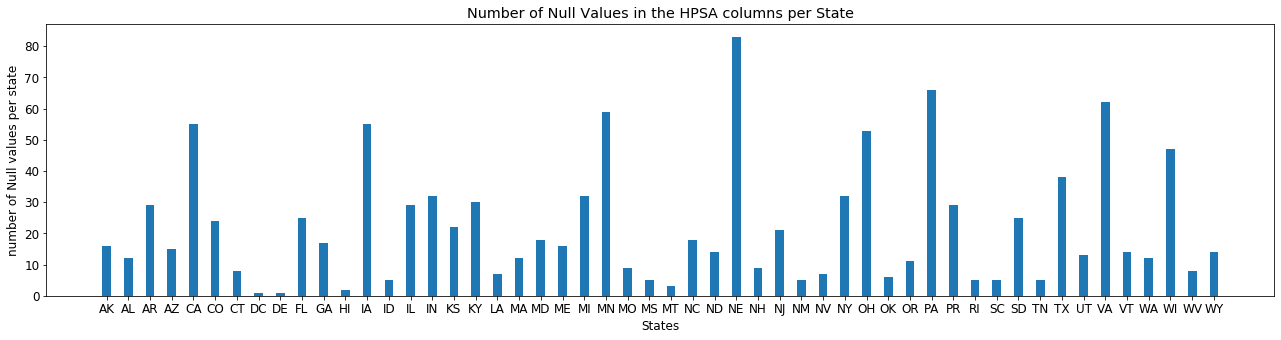

In [10]:
plt.figure(figsize=(22,5))
plt.title('Number of Null Values in the HPSA columns per State')
plt.xlabel('States')
plt.ylabel('number of Null values per state')
county_nas = abridged_counties_filtered[abridged_counties_filtered['HPSAShortage'].isna()].groupby('StateName').count().reset_index()
plt.bar(county_nas['StateName'], county_nas['CountyName'], .4)

### Steps to cleaning up the abridged counties data frame
We realize that we couldn't just fill the null values with 0's because there are other counties in some states that recorded this data. Instead me decided to impute the null values for this column and others in abridged_counties_filtered with the mean for all counties in the state county that have a null value.

___
### Cleaning up the abridged counties filtered data frame
All counties that had null values for the columns `SVIPercentile`, `HPSAShortage`, `HPSAServedPop`, and `HPSAUnderservedPop`have their null values replaced with the respective mean value of the counties state. We are choosing to impute the mean because we want the estimate of the mean of these values to remain unbiased, in addition if we plan on running a regression on a sample of the data, the full sample size will be maintained.


In [11]:
for i in abridged_counties_filtered.columns[2:]:
    abridged_counties_filtered.loc[:, i] = abridged_counties_filtered.loc[:, i].fillna(abridged_counties_filtered.groupby('StateName')[i].transform('mean'))
abridged_counties_filtered.head()


/Users/divineechidume/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,CountyName,StateName,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,Autauga,AL,0.4354,4.394415,22099.309091,13454.418182
1,Baldwin,AL,0.2162,4.394415,22099.309091,13454.418182
2,Barbour,AL,0.9959,6.080000,5400.000000,18241.000000
3,Bibb,AL,0.6003,2.750000,14980.000000,6120.000000
4,Blount,AL,0.4242,7.210000,31850.000000,25233.000000


<BarContainer object of 7 artists>

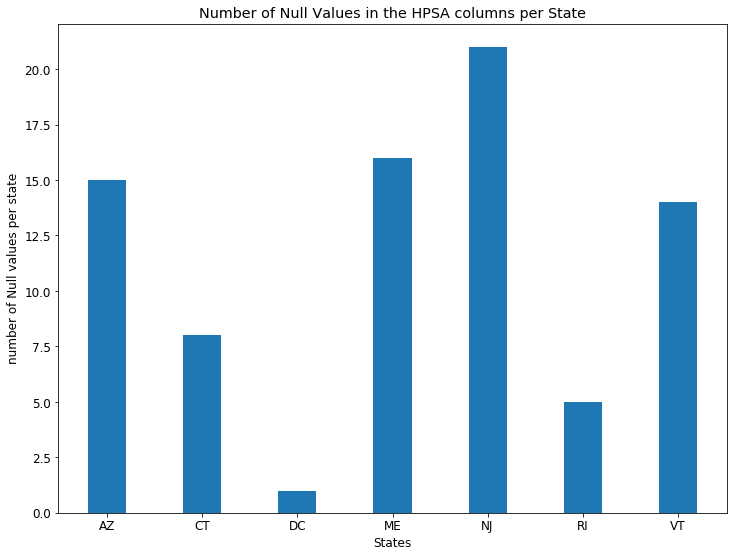

In [12]:
plt.title('Number of Null Values in the HPSA columns per State')
plt.xlabel('States')
plt.ylabel('number of Null values per state')
county_nas = abridged_counties_filtered[abridged_counties_filtered['HPSAShortage'].isna()].groupby('StateName').count().reset_index()
plt.bar(county_nas['StateName'], county_nas['CountyName'], .4)

We still have null values for some states with respect to the HPSAShortage column. We decided to filter out those rows because we cannot state the cause of lack of information. Inputting 0 on these values might misrepresent the nature of the situation. We applied this logic to the other columns in the abridged_counties_filtered dataframe. 

In [13]:
abridged_counties_filtered = abridged_counties_filtered[abridged_counties_filtered.SVIPercentile.notnull() 
                                         & abridged_counties_filtered.HPSAShortage.notnull()
                                         & abridged_counties_filtered.HPSAServedPop.notnull()
                                         & abridged_counties_filtered.HPSAUnderservedPop.notnull()]
                                        

In [14]:
abridged_counties_filtered.head()

,CountyName,StateName,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop
0,Autauga,AL,0.4354,4.394415,22099.309091,13454.418182
1,Baldwin,AL,0.2162,4.394415,22099.309091,13454.418182
2,Barbour,AL,0.9959,6.080000,5400.000000,18241.000000
3,Bibb,AL,0.6003,2.750000,14980.000000,6120.000000
4,Blount,AL,0.4242,7.210000,31850.000000,25233.000000


### Cleaning up the states data frame
___
Because the region of our analysis is in the United States, we decided to filter out all country_regions that were not US. In addition we are unable to fully trust the data from other counties due to the excessive null values. In addition we wanted to work with counties that have collected data on the number of people tested and hospitalized.


In [15]:
states.head()

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,2020-04-18 22:32:47,32.3182,-86.9023,4712,153,NaN,4559.0,1.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,2020-04-18 22:32:47,61.3707,-152.4044,314,9,147.0,305.0,2.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
2,American Samoa,US,NaN,-14.2710,-170.1320,0,0,NaN,NaN,60.0,0.000000,3.0,NaN,NaN,16,ASM,5.391708,NaN
3,Arizona,US,2020-04-18 22:32:47,33.7298,-111.4312,4724,180,539.0,4544.0,4.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,2020-04-18 22:32:47,34.9697,-92.3731,1744,38,703.0,1706.0,5.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780


In [16]:
states_covid = states[['Province_State', 'Country_Region',
       'Confirmed', 'Deaths', 'Recovered', 'Active', 'Incident_Rate',
       'People_Tested', 'People_Hospitalized', 'Mortality_Rate', 'UID', 'ISO3',
       'Testing_Rate', 'Hospitalization_Rate']]


states_covid_filtered = states_covid[states_covid['Country_Region'] == 'US']
states_covid_filtered = states_covid_filtered[states_covid_filtered.People_Tested.notnull() &
                                              states_covid_filtered.People_Hospitalized.notnull()]
states_covid_filtered.head(5)

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,4712,153,NaN,4559.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,314,9,147.0,305.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
3,Arizona,US,4724,180,539.0,4544.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,1744,38,703.0,1706.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780
5,California,US,30491,1140,NaN,29351.0,77.766063,251614.0,4892.0,3.738808,84000006,USA,641.731334,16.044079


### Interesting find with null values in the states dataframe
Dropping all of the rows that had null values for the number of people tested and people hospitalized left us with data from states and territories in the United States. Another interesting find is rows that don't have any covid-19 recoveries, have null values instead of zeros. We are just imputing them with 0 instead of just dropping those rows.


In [17]:
states_covid_filtered.loc[:,'Recovered'] = states_covid_filtered['Recovered'].fillna(0)
states_covid_filtered.head(5)

,Province_State,Country_Region,Confirmed,Deaths,Recovered,Active,Incident_Rate,People_Tested,People_Hospitalized,Mortality_Rate,UID,ISO3,Testing_Rate,Hospitalization_Rate
0,Alabama,US,4712,153,0.0,4559.0,100.492717,42538.0,620.0,3.247029,84000001,USA,907.206961,13.157895
1,Alaska,US,314,9,147.0,305.0,52.530410,9655.0,39.0,2.866242,84000002,USA,1615.226458,12.420382
3,Arizona,US,4724,180,539.0,4544.0,64.901548,51045.0,566.0,3.810330,84000004,USA,701.291175,11.981372
4,Arkansas,US,1744,38,703.0,1706.0,67.361213,24141.0,291.0,2.178899,84000005,USA,932.435235,16.685780
5,California,US,30491,1140,0.0,29351.0,77.766063,251614.0,4892.0,3.738808,84000006,USA,641.731334,16.044079


### Cleaning up the us confirmed cases data frame
___
Cleaning up the US confirmed cases data frame was relatively straight forward. In order to make sure that we were working with the same counties in all of our data frames, we made sure to filter out rows that didn't have counties in our abridged_counties_filtered data frame.

In [18]:
us_confirmed.head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
0,16,AS,ASM,16,60.0,NaN,American Samoa,US,-14.2710,-170.1320,...,0,0,0,0,0,0,0,0,0,0
1,316,GU,GUM,316,66.0,NaN,Guam,US,13.4443,144.7937,...,128,130,133,133,133,133,135,135,136,136
2,580,MP,MNP,580,69.0,NaN,Northern Mariana Islands,US,15.0979,145.6739,...,11,11,11,11,11,11,13,13,13,14
3,630,PR,PRI,630,72.0,NaN,Puerto Rico,US,18.2208,-66.5901,...,683,725,788,897,903,923,974,1043,1068,1118
4,850,VI,VIR,850,78.0,NaN,Virgin Islands,US,18.3358,-64.8963,...,45,50,51,51,51,51,51,51,51,53


In [21]:
matchingCounties = abridged_counties_filtered['CountyName'].to_list()
us_confirmed_filtered = us_confirmed[us_confirmed['Admin2'].isin(matchingCounties)]
us_confirmed_filtered.head(5)

,UID,iso2,iso3,code3,FIPS,Admin2,Province_State,Country_Region,Lat,Long_,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
5,84001001,US,USA,840,1001.0,Autauga,Alabama,US,32.539527,-86.644082,...,15,17,19,19,19,23,24,26,26,25
6,84001003,US,USA,840,1003.0,Baldwin,Alabama,US,30.727750,-87.722071,...,56,59,66,71,72,87,91,101,103,109
7,84001005,US,USA,840,1005.0,Barbour,Alabama,US,31.868263,-85.387129,...,4,9,9,10,10,11,12,14,15,18
8,84001007,US,USA,840,1007.0,Bibb,Alabama,US,32.996421,-87.125115,...,9,11,13,16,17,17,18,22,24,26
9,84001009,US,USA,840,1009.0,Blount,Alabama,US,33.982109,-86.567906,...,11,12,12,13,14,16,17,18,20,20


We narrowed down the columns in this data frame to `Admin2`, `Province_State`, `Country_Region`, and the dates columns because we wanted to focus on Covid-19 cases per county.

In [22]:
us_confirmed_filtered_columns = ['Admin2', 'Province_State', 'Country_Region'] + us_confirmed_filtered.columns.to_list()[11:]
us_confirmed_filtered = us_confirmed_filtered[us_confirmed_filtered_columns]
us_confirmed_filtered.head(5)


,Admin2,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
5,Autauga,Alabama,US,0,0,0,0,0,0,0,...,15,17,19,19,19,23,24,26,26,25
6,Baldwin,Alabama,US,0,0,0,0,0,0,0,...,56,59,66,71,72,87,91,101,103,109
7,Barbour,Alabama,US,0,0,0,0,0,0,0,...,4,9,9,10,10,11,12,14,15,18
8,Bibb,Alabama,US,0,0,0,0,0,0,0,...,9,11,13,16,17,17,18,22,24,26
9,Blount,Alabama,US,0,0,0,0,0,0,0,...,11,12,12,13,14,16,17,18,20,20


We noticed that the number counties differs between the abridged_counties_filtered dataframe and the us_confirmed_filtered dataframe.

### Cleaning up the US deaths data frame
___
We filtered out columns and rows in the us_deaths to have the same columns and rows. as the us_confirmed_filtered data frame.

In [23]:
us_deaths
us_deaths_filtered = us_deaths[us_deaths ['Admin2'].isin(matchingCounties)]
us_deaths_filtered = us_deaths_filtered[us_confirmed_filtered_columns]
us_deaths_filtered.head(5)

,Admin2,Province_State,Country_Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,...,4/9/20,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20
5,Autauga,Alabama,US,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,2,2
6,Baldwin,Alabama,US,0,0,0,0,0,0,0,...,1,1,1,1,1,2,2,2,2,2
7,Barbour,Alabama,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,Bibb,Alabama,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,Blount,Alabama,US,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Data Analysis
As initially mentioned, the goal of our data was to find the impact that covid-19 has undersupported regions in the United States. To gather some initial insights we looked at the distribution of HPSAShortage across different countries. 

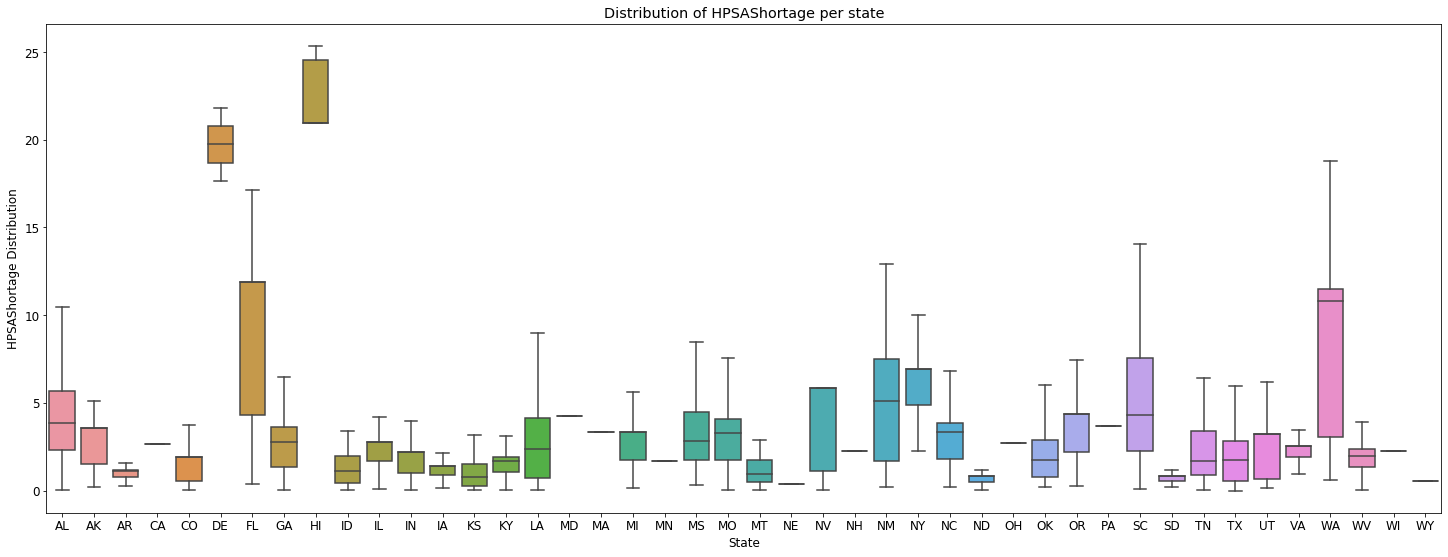

In [24]:
plt.figure(figsize=(25,9))
ax = sns.boxplot(x='StateName', y='HPSAShortage', showfliers=False, data=abridged_counties_filtered)
plt.xlabel('State')
plt.ylabel('HPSAShortage Distribution')
plt.title('Distribution of HPSAShortage per state')
plt.show()

We noticed that most states especially Florida, New Hampshire, and Washington wildly varied in the HPSAShortage values of their respective counties. This means that working with some aggregate of HPSAShortage per state might not give us the granularity that we need for our analysis. Instead we decided to create a new data frame that contained the mortality rate for Covid-19 of each county in the United States.

In [25]:
us_confirmed_filtered['total_confirmed_cases'] = us_confirmed_filtered['4/18/20']
us_deaths_filtered['total_deaths'] = us_deaths_filtered['4/18/20']

deaths_and_confirmed = us_confirmed_filtered[['Admin2', 'Province_State', 'total_confirmed_cases']]

us_state_abbrev = {'Alabama': 'AL', 'Alaska': 'AK', 'American Samoa': 'AS', 'Arizona': 'AZ',
    'Arkansas': 'AR', 'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT',
    'Delaware': 'DE', 'District of Columbia': 'DC', 'Florida': 'FL', 'Georgia': 'GA',
    'Guam': 'GU','Hawaii': 'HI','Idaho': 'ID','Illinois': 'IL','Indiana': 'IN','Iowa': 'IA',
    'Kansas': 'KS','Kentucky': 'KY', 'Louisiana': 'LA','Maine': 'ME','Maryland': 'MD',
    'Massachusetts': 'MA','Michigan': 'MI','Minnesota': 'MN','Mississippi': 'MS',
    'Missouri': 'MO','Montana': 'MT', 'Nebraska': 'NE','Nevada': 'NV',
    'New Hampshire': 'NH','New Jersey': 'NJ', 'New Mexico': 'NM','New York': 'NY',
    'North Carolina': 'NC','North Dakota': 'ND', 'Northern Mariana Islands':'MP','Ohio': 'OH',
    'Oklahoma': 'OK','Oregon': 'OR','Pennsylvania': 'PA','Puerto Rico': 'PR',
    'Rhode Island': 'RI','South Carolina': 'SC','South Dakota': 'SD','Tennessee': 'TN',
    'Texas': 'TX','Utah': 'UT','Vermont': 'VT','Virgin Islands': 'VI','Virginia': 'VA',
    'Washington': 'WA','West Virginia': 'WV','Wisconsin': 'WI','Wyoming': 'WY'}

deaths_and_confirmed = deaths_and_confirmed.replace(us_state_abbrev)
deaths_and_confirmed['total_deaths'] = us_deaths_filtered[['total_deaths']]
deaths_and_confirmed['mortality_rate'] = deaths_and_confirmed.apply(lambda row: (row.total_deaths / max(row.total_confirmed_cases, 1))*100, axis=1)
deaths_and_confirmed.head()


,Admin2,Province_State,total_confirmed_cases,total_deaths,mortality_rate
5,Autauga,AL,25,2,8.000000
6,Baldwin,AL,109,2,1.834862
7,Barbour,AL,18,0,0.000000
8,Bibb,AL,26,0,0.000000
9,Blount,AL,20,0,0.000000


### States with low confirmed cases can have high mortality rates

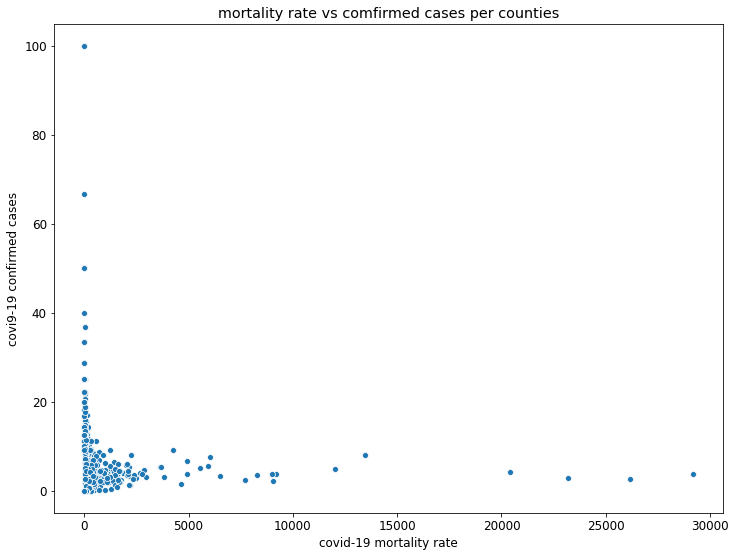

In [26]:
final_df = pd.merge(deaths_and_confirmed, abridged_counties_filtered,  how='inner', left_on=['Admin2', 'Province_State'], right_on = ['CountyName', 'StateName'])
sns.scatterplot(x="total_confirmed_cases", y="mortality_rate", data=final_df)
plt.xlabel('covid-19 mortality rate')
plt.ylabel('covi9-19 confirmed cases')
plt.title('mortality rate vs comfirmed cases per counties')
plt.show()

### Does having a HPSA shortage greater than or equal to 16, indicate a covid-19 mortality greater than the national average?

In order to answer this question we need to first determine the national mortality rate due to Covid-19. We are using the states_covid_filtered filtered data frame rather than our created deaths_and_confirmed dataframe because there might be additional counties used to compute values in the total_deaths deaths and total_confirmed_cases columns that might not be explicitly listed in our deaths_and_confirmed data frame.


In [159]:
total_US_cases = sum(states_covid_filtered['Confirmed'])
total_US_deaths = sum(states_covid_filtered['Deaths'])
national_mortality_rate = total_US_cases/total_US_deaths
print("The national mortality rate is", national_mortality_rate)

The national mortality rate is 18.884975844135273


To answer this question our classifier will always predict False when HPSAShortage is greater than 16 and True when HPSAShortage is less than or equal to 16. 

In order to do this we created two new columns in the final dataframe, the first being under_served_area.
- `under_served_area`= True when HPSAShortage > 16
- `under_served_area` = False when HPSAShortage > 16

The second column we created is danger_DR(danger death rate)
- `mort_rate_grtr_avg` = 1 when mortality_rate > national_mortality_rate
- `mort_rate_grtr_avg` = 0 when mortality_rate <= national_mortality_rate

In [168]:
final_df = pd.merge(deaths_and_confirmed, abridged_counties_filtered,  how='inner', left_on=['Admin2', 'Province_State'], right_on = ['CountyName', 'StateName'])
final_df['mort_rate_grtr_avg'] = final_df.apply (lambda row: row['mortality_rate']>national_mortality_rate, axis=1)
final_df['under_served_area'] = final_df.apply (lambda row: row['HPSAShortage']> 16, axis=1)

final_df.head()


,Admin2,Province_State,total_confirmed_cases,total_deaths,mortality_rate,CountyName,StateName,SVIPercentile,HPSAShortage,HPSAServedPop,HPSAUnderservedPop,mort_rate_grtr_avg,under_served_area
0,Autauga,AL,25,2,8.000000,Autauga,AL,0.4354,4.394415,22099.309091,13454.418182,False,False
1,Baldwin,AL,109,2,1.834862,Baldwin,AL,0.2162,4.394415,22099.309091,13454.418182,False,False
2,Barbour,AL,18,0,0.000000,Barbour,AL,0.9959,6.080000,5400.000000,18241.000000,False,False
3,Bibb,AL,26,0,0.000000,Bibb,AL,0.6003,2.750000,14980.000000,6120.000000,False,False
4,Blount,AL,20,0,0.000000,Blount,AL,0.4242,7.210000,31850.000000,25233.000000,False,False


There are two kinds of errors our classifier can make.
- False positive (FP): a county gets flagged as having a mortality rate greater than the national average
- False negative (FN): a county gets flagged as having a mortality rate less or equal to the national average

In [204]:
assumed_pos_count = len(final_df[final_df['HPSAShortage'] >=16])
FP = final_df[final_df['HPSAShortage'] >=16]['mort_rate_grtr_avg'].value_counts()[False]
TP = 0

assumed_neg_count = len(final_df[final_df['HPSAShortage'] < 16])
FN = final_df[final_df['HPSAShortage'] < 16]['mort_rate_grtr_avg'].value_counts()[True]
TN = final_df[final_df['HPSAShortage'] < 16]['mort_rate_grtr_avg'].value_counts()[False]

print("The false positive count is ", FP)
print("The true positive count is ", TP)
print("The false negative count is ", FN)
print("The true negative count is ", TN)

The false positive count is  53
The true positive count is  0
The false negative count is  60
The true negative count is  2808


Note that The `true_pos_count` is 0 because the number of counties with `under_served_area` = True and `mort_rate_grtr_avg` = True is 0

Now that we have the FP and FN, we can use those values to calculate the precision and recall of this classifier.

**Precision** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FP}}$ of counties flagged as having a mortality rather greater than the national average that actually have a mortality rate greater than the national average.

**Recall** measures the proportion $\frac{\text{TP}}{\text{TP} + \text{FN}}$ of the counties that were correctly flagged as having a mortaliy rate greater than the national average. 

In [206]:
predictor_precision = TP/(TP+FP)
predictor_recall = TP/(TP+FN)
print("The predictor's precision is ", predictor_precision)
print("The predictor's recall is ", predictor_recall)

"""accuracy is 0 because number of the counties with covid-19 cases greater
    than the national mortality rate is 0"""
print("The predictor's accuracy is", 0.0 )

The predictor's precision is  0.0
The predictor's recall is  0.0
The predictor's accuracy is 0.0


The predictor's precision and recall both being 0 indicates that our classifier is grossly inaccurate. This result was shocking to us. While we didn't expect this factor to be extremely accurate, we didn't expect our True positive count to be 0. After evaluating our classifier we listed some potential reasons for the gross inaccuracy below.
- We could have chosen the wrong HPSA shortage value to base our classifier on. By law the greatest need is based on HPSA values defined annually. (2) So the HPSASHortage value defined for greatest need could be different for 2020
- Our calculation for average mortality could be wildly off. This is partially due to this not being the most up to date dataset and there being more thorough testing for Covid-19 since this data was collected.


(2)https://nhsc.hrsa.gov/currentmembers/scholars/fromtrainingtopractice/disciplinesdesignfuture.pdf

### Further Analysis
Although we cannot control the HPSAShortage value defined for greatest need could be different for 2020, we can look in general at how HPSAShortage impacts the mortality rate through creating a  LogisticRegression classifier.

In [211]:
# Define our features/target
X = final_df[["HPSAShortage"]]

# Target final_df['mort_rate_grtr_avg'] = False is mort rate > average True mort rate<= Avg
Y = np.array(final_df.mort_rate_grtr_avg == True)


# Split between train and test
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


x_train, x_test,y_train,y_test = train_test_split(X,Y, test_size=0.25, random_state=42)

print(f"Training Data Size: {len(x_train)}")
print(f"Test Data Size: {len(x_test)}")

model = LogisticRegression(fit_intercept=True)

model.fit(x_train,y_train) 
train_accuracy = model.score(x_train, y_train)
test_accuracy = test_accuracy = sum(model.predict(x_test) == y_test) / len(y_train)


print(f"Train accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")

y_pred = model.predict(x_test)
precision = np.sum((y_pred == y_test) & (y_pred == True)) / np.sum(y_pred)
recall = np.sum((y_pred == y_test) & (y_pred == True)) / np.sum(y_test)

print(f'precision = {precision:.4f}')
print(f'recall = {recall:.4f}')

Training Data Size: 2190
Test Data Size: 731
Train accuracy: 0.9795
Test accuracy: 0.3269
precision = nan
recall = 0.0000


/Users/divineechidume/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: invalid value encountered in long_scalars


we decided to switch to a linear model that is trying to predict mortality rates in order to see how the previous model was misclassifying. The model that we created is not very accurate in predicting the mortality rate of the counties. Although we were able to slightly reduce the error by adding more indicators to our model, the model consistently underestimates the true mortality rate. This likely comes from the model being unable to capture the relationship between mortality rate and the social indicators. It is likely that a different model will need to be used. We do not have the data necessary to create this supposed model.


In [216]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import DictVectorizer

def rmse(actual_y, predicted_y):
    return np.sqrt(np.mean((actual_y - predicted_y)**2))

X = final_df[['HPSAShortage']]
Y = final_df['mortality_rate']

model = LinearRegression()
model.fit(X, Y)
Y_hat = model.predict(X)
error = rmse(Y, Y_hat)
print("rmse1", error)


X1 = final_df[['SVIPercentile', 'HPSAShortage', 'HPSAUnderservedPop']]
model1 = LinearRegression()
model1.fit(X1, Y)
Y_hat1 = model1.predict(X1)
error1 = rmse(Y, Y_hat1)

print("rmse2", error1)


rmse1 7.159739174784949
rmse2 7.152701196228398


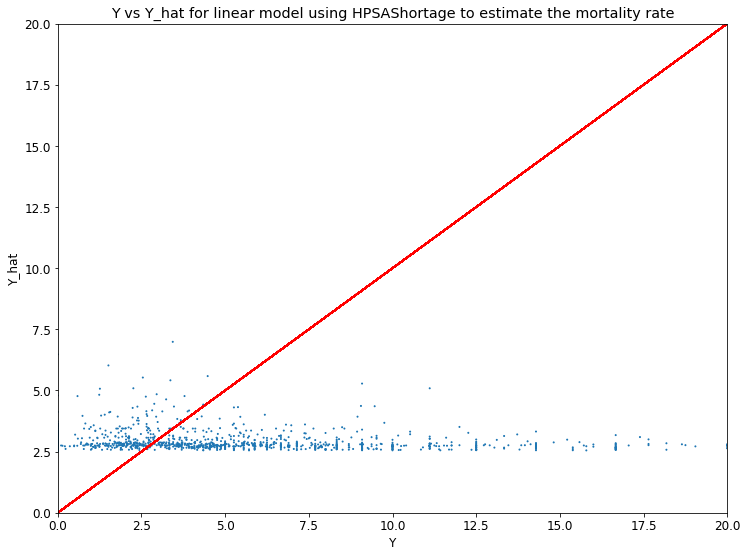

In [213]:
Y_s = [1 for _ in range(len(Y))] # setting the sizes of the markers to 1
plt.ylim(0,20)
plt.xlim(0,20)

plt.scatter(Y, Y_hat, s = Y_s)
plt.plot(Y, Y, c = 'r') # the identity line
plt.xlabel('Y')
plt.ylabel('Y_hat')
plt.title('Y vs Y_hat for linear model using HPSAShortage to estimate the mortality rate')
plt.show()

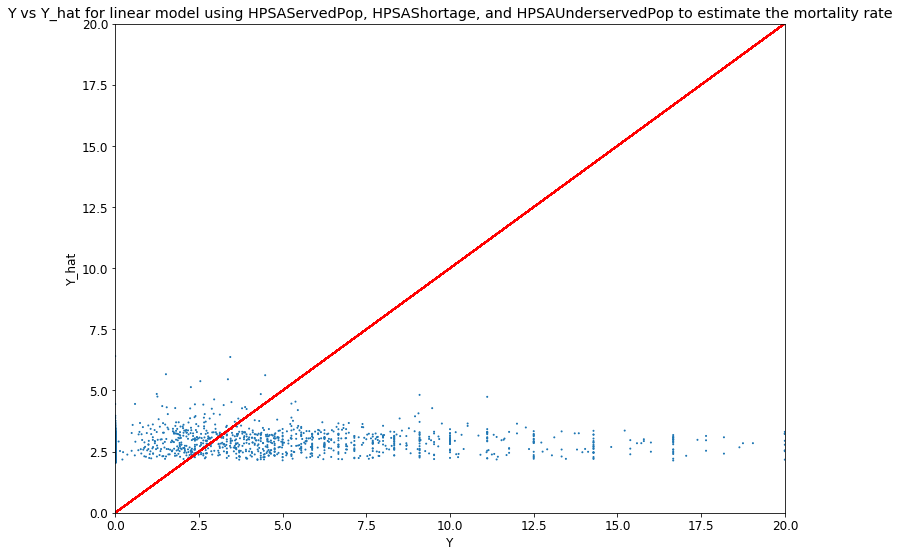

In [214]:
Y_s = [1 for _ in range(len(Y))] # setting the sizes of the markers to 1
plt.ylim(0,20)
plt.xlim(0,20)

plt.scatter(Y, Y_hat1, s = Y_s)
plt.plot(Y, Y, c = 'r') # the identity line
plt.xlabel('Y')
plt.ylabel('Y_hat')
plt.title('Y vs Y_hat for linear model using HPSAServedPop, HPSAShortage, and HPSAUnderservedPop to estimate the mortality rate')
plt.show()

### Conclusion

In answering out intial problem statement having an HPSAShortage of 16 or above does not indicate a covid-19 mortality greater than the national average. HPSAShortage, SVIPercentile, and HPSAUnderservedPop are factors that can help give insight on mortality rate bu those factors alone do not provide the entire picture. We saw that the data that we were given was not sufficient in making predictions without significant ethical struggles and high error. If we were to make a conclusion, it would be that the underserved-factors factors do not have a linear relationship with mortality rate from COVID-19. For future analysis, I would recommend that people experiment with quadratic features and other types of non-linear models so that we can create a more accurate model. 	